# Additional Class Materials<br><font color="crimson">Text Processing 101</font> 

John McLevey & Jillian Anderson  
GESIS Spring Seminar, March 2020 

First, download spacy and spacy's small English language model 

In [ ]:
#!pip install spacy
#!python -m spacy download en_core_web_sm

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg' # better resolution with vector graphics! 

import spacy 
nlp = spacy.load('en_core_web_sm')
from spacy import displacy

Let's start simple. Here's a single abstract from a journal article. We will use it to illustrate some basic concepts before moving on to larger datasets. 

> In this article, we review evidence from the social and medical sciences on the causes and effects of lead exposure. We argue that lead exposure is an important subject for sociological analysis because it is socially stratified and has important social consequences -- consequences that themselves depend in part on children's social environments. We present a model of environmental inequality over the life course to guide an agenda for future research. We conclude with a call for deeper exchange between urban sociology, environmental sociology, and public health, and for more collaboration between scholars and local communities in the pursuit of independent science for the common good.

# The `spaCy` pipeline

In [2]:
ab = "In this article, we review evidence from the social and medical sciences on the causes and effects of lead exposure. We argue that lead exposure is an important subject for sociological analysis because it is socially stratified and has important social consequences -- consequences that themselves depend in part on children's social environments. We present a model of environmental inequality over the life course to guide an agenda for future research. We conclude with a call for deeper exchange between urban sociology, environmental sociology, and public health, and for more collaboration between scholars and local communities in the pursuit of independent science for the common good."

In [3]:
sdoc = nlp(ab)

We get back a `spaCy` `doc` object. 

In [4]:
type(sdoc)

spacy.tokens.doc.Doc

In [5]:
sdoc

In this article, we review evidence from the social and medical sciences on the causes and effects of lead exposure. We argue that lead exposure is an important subject for sociological analysis because it is socially stratified and has important social consequences -- consequences that themselves depend in part on children's social environments. We present a model of environmental inequality over the life course to guide an agenda for future research. We conclude with a call for deeper exchange between urban sociology, environmental sociology, and public health, and for more collaboration between scholars and local communities in the pursuit of independent science for the common good.

In [6]:
for token in sdoc:
    print(token)

In
this
article
,
we
review
evidence
from
the
social
and
medical
sciences
on
the
causes
and
effects
of
lead
exposure
.
We
argue
that
lead
exposure
is
an
important
subject
for
sociological
analysis
because
it
is
socially
stratified
and
has
important
social
consequences
--
consequences
that
themselves
depend
in
part
on
children
's
social
environments
.
We
present
a
model
of
environmental
inequality
over
the
life
course
to
guide
an
agenda
for
future
research
.
We
conclude
with
a
call
for
deeper
exchange
between
urban
sociology
,
environmental
sociology
,
and
public
health
,
and
for
more
collaboration
between
scholars
and
local
communities
in
the
pursuit
of
independent
science
for
the
common
good
.


In [7]:
for token in sdoc:
    print(token, ':' , token.pos_)

In : ADP
this : DET
article : NOUN
, : PUNCT
we : PRON
review : VERB
evidence : NOUN
from : ADP
the : DET
social : ADJ
and : CCONJ
medical : ADJ
sciences : NOUN
on : ADP
the : DET
causes : NOUN
and : CCONJ
effects : NOUN
of : ADP
lead : NOUN
exposure : NOUN
. : PUNCT
We : PRON
argue : VERB
that : DET
lead : NOUN
exposure : NOUN
is : AUX
an : DET
important : ADJ
subject : NOUN
for : ADP
sociological : ADJ
analysis : NOUN
because : SCONJ
it : PRON
is : AUX
socially : ADV
stratified : ADJ
and : CCONJ
has : AUX
important : ADJ
social : ADJ
consequences : NOUN
-- : PUNCT
consequences : NOUN
that : SCONJ
themselves : PRON
depend : VERB
in : ADP
part : NOUN
on : ADP
children : NOUN
's : PART
social : ADJ
environments : NOUN
. : PUNCT
We : PRON
present : VERB
a : DET
model : NOUN
of : ADP
environmental : ADJ
inequality : NOUN
over : ADP
the : DET
life : NOUN
course : NOUN
to : PART
guide : VERB
an : DET
agenda : NOUN
for : ADP
future : ADJ
research : NOUN
. : PUNCT
We : PRON
conclude : VERB
wi

In [8]:
spacy.explain('SCONJ')

'subordinating conjunction'

In [ ]:
for sent in sdoc.sents:
    print(sent, '\n')

In [ ]:
for chunk in sdoc.noun_chunks:
    print(chunk)

In [ ]:
displacy.serve(sdoc.sents) # you will need to interpupt the kernel to end this. 
# you can probably use this one since you are running local host, but either should work 
# displacy.serve(sdoc.sents) 

In [ ]:
from collections import Counter

just_words = [token.text for token in sdoc if token.is_stop != True and token.is_punct != True]
just_words

In [ ]:
word_freq = Counter(just_words)
common_words = word_freq.most_common(6)
print(common_words)

We can use most common without specifying a number and get a count for all of them. 

In [ ]:
wcounts = pd.DataFrame(word_freq.most_common(), columns = ['Word', 'Freq'])
wcounts

In [ ]:
def custom_word_counter(spacy_doc, reduce = True):
    
    # stop words? punct? 
    if reduce is True:
        toks = [token.text for token in spacy_doc if token.is_stop != True and token.is_punct != True]
    else:
        toks = [token.text for token in spacy_doc]
        
    freq = Counter(toks)
    
    df = pd.DataFrame(freq.most_common(), columns = ['Word', 'Freq'])
    
    return df

In [ ]:
custom_word_counter(sdoc)[:10]

Looks good. We can use this function elsewhere now, providing only the `spacy` doc object to count tokens in. 

Of course we can do a LOT more than this. 

# Some More Interesting Data

In [ ]:
# !pip3 install wikipedia # non-windows?
# !pip install wikipedia # windows?

In [9]:
import pandas as pd 
import wikipedia
from collections import Counter

In [10]:
search_term = 'European Union'
search_results = wikipedia.search(search_term)
search_results

['European Union',
 'European Union Customs Union',
 'Member state of the European Union',
 'Citizenship of the European Union',
 'Enlargement of the European Union',
 'Passports of the European Union',
 'Institutions of the European Union',
 'European Parliament',
 'European Commission',
 'European Broadcasting Union']

In [11]:
text = []
for result in search_results:
    page = wikipedia.page(title=result)
    text.append(page.content)

In [12]:
len(text)

10

In [13]:
text[0]

'The European Union (EU) is a political and economic union of 27 member states that are located primarily in Europe. Its members have a combined area of 4,233,255.3 km2 (1,634,469.0 sq mi) and an estimated total population of about 447 million. The EU has developed an internal single market through a standardised system of laws that apply in all member states in those matters, and only those matters, where members have agreed to act as one. EU policies aim to ensure the free movement of people, goods, services and capital within the internal market, enact legislation in justice and home affairs and maintain common policies on trade, agriculture, fisheries and regional development. For travel within the Schengen Area, passport controls have been abolished. A monetary union was established in 1999, coming into full force in 2002, and is composed of 19 EU member states which use the euro currency.\nThe EU and European citizenship were established when the Maastricht Treaty came into force

In [14]:
# docs = [nlp(t) for t in text] # a common way
docs = list(nlp.pipe(text)) # a faster way 

In [15]:
type(docs)

list

In [16]:
for doc in docs:
    print(len(doc))

15331
832
4312
4678
4508
3281
3603
11305
5979
3349


In [17]:
[ent for ent in docs[0].ents]

[The European Union,
 EU,
 27,
 Europe,
 about 447 million,
 EU,
 one,
 EU,
 the Schengen Area,
 1999,
 2002,
 19,
 EU,
 EU,
 European,
 the Maastricht Treaty,
 1993,
 EU,
 the European Coal and Steel Community,
 ECSC,
 the European Economic Community,
 EEC,
 1951,
 Paris,
 1957,
 Rome,
 the European Communities,
 Six,
 Belgium,
 France,
 Italy,
 Luxembourg,
 the Netherlands,
 West Germany,
 Communities,
 EU,
 the Treaty of Lisbon,
 2009,
 January 2020,
 United Kingdom,
 first,
 EU,
 2016,
 UK,
 UK,
 at least 31 December 2020,
 EU,
 EU,
 only three,
 EU,
 French,
 Algeria,
 1962,
 Greenland,
 1985,
 Saint Barthélemy,
 2012,
 2020,
 some 5.8%,
 EU,
 2017,
 the United Kingdom,
 around 20 trillion US dollars,
 approximately 25%,
 EU,
 the United Nations Development Programme,
 2012,
 EU,
 the Nobel Peace Prize,
 EU,
 the United Nations,
 the World Trade Organization,
 G20,
 the European Union,
 Background,
 the centuries,
 Rome,
 476,
 European,
 Roman Empire,
 the Frankish Empire,
 481–8

In [20]:
docs[1]

The European Union Customs Union (EUCU) is a customs union which consists of all the member states of the European Union (EU), Monaco, the United Kingdom, and some dependencies of the United Kingdom which were not part of the EU. Some detached territories of EU members do not participate in the customs union, usually as a result of their geographic separation. In addition to the EUCU, the EU is in customs unions with Andorra, San Marino, and Turkey (with the exceptions of certain goods), through separate bilateral agreements.The customs union is a principal component of the European Union, since its establishment in 1958 as the European Economic Community. There are no tariffs or non-tariff barriers to trade between members of the customs union and –  unlike a free trade area –  members of the customs union impose a common external tariff on all goods entering the union.The European Commission negotiates for and on behalf of the Union as a whole in international trade deals (such as th

In [21]:
ent_types = [ent.label_ for ent in docs[1].ents]
print('Found {} named entities'.format(len(ent_types)))
Counter(ent_types).most_common()

Found 103 named entities


[('ORG', 57),
 ('GPE', 21),
 ('NORP', 7),
 ('PERSON', 7),
 ('DATE', 6),
 ('CARDINAL', 2),
 ('LAW', 2),
 ('LOC', 1)]

In [22]:
spacy.explain('NORP')

'Nationalities or religious or political groups'

In [23]:
spacy.explain('LOC')

'Non-GPE locations, mountain ranges, bodies of water'

In [24]:
for ent in docs[1].ents:
    if ent.label_ is "GPE":
        print(ent)

Monaco
the United Kingdom
the United Kingdom
San Marino
Turkey
Canada
Brexit
the United Kingdom
the United Kingdom's
Non-EU
Monaco
the United Kingdom
Akrotiri
Dhekelia
the Isle of Man
San Marino
Turkey
Switzerland
Switzerland
Switzerland
Turkey


In [25]:
Counter([str(ent) for ent in docs[1].ents if ent.label_ is 'GPE']).most_common(10)

[('the United Kingdom', 4),
 ('Turkey', 3),
 ('Switzerland', 3),
 ('Monaco', 2),
 ('San Marino', 2),
 ('Canada', 1),
 ('Brexit', 1),
 ("the United Kingdom's", 1),
 ('Non-EU', 1),
 ('Akrotiri', 1)]

In [26]:
Counter([str(ent) for ent in docs[1].ents if ent.label_ is 'ORG']).most_common(10)

[('EU', 15),
 ('the European Union', 4),
 ('EUCU', 2),
 ('Andorra', 2),
 ('the customs union', 2),
 ('The European Commission', 2),
 ('WTO', 2),
 ('European Commission', 2),
 ('Communication and Information Resource Centre', 2),
 ('Citizens', 2)]

In [29]:
gpe_org = [str(ent) for ent in docs[1].ents if ent.label_ in ['GPE', 'ORG']]

In [30]:
gpe_org

['The European Union Customs Union',
 'EUCU',
 'the European Union',
 'EU',
 'Monaco',
 'the United Kingdom',
 'the United Kingdom',
 'EU',
 'EU',
 'EUCU',
 'EU',
 'Andorra',
 'San Marino',
 'Turkey',
 'The customs union',
 'the European Union',
 'the European Economic Community',
 'the customs union',
 'the customs union',
 'The European Commission',
 'Union',
 'Canada',
 'the World Trade Organization',
 'Brexit',
 'the United Kingdom',
 'the Customs Union',
 "the United Kingdom's",
 'the European Union',
 'Non-EU',
 'Monaco',
 'the United Kingdom',
 'Akrotiri',
 'Dhekelia',
 'the Isle of Man',
 'EU',
 'Andorra',
 'San Marino',
 'Turkey',
 'EU',
 'EU',
 'EU',
 'EU',
 'EU',
 'the European Union',
 'EU',
 'Büsingen',
 'Switzerland',
 'Switzerland',
 'Livigno',
 'The European Commission',
 'UCC',
 'The EU Customs Union',
 'EU',
 'WTO',
 'EU',
 'WTO',
 'Arms',
 'EU',
 'European Customs Information Portal',
 'EU',
 'EFTA',
 'Switzerland',
 'European Free Trade Association',
 'European Unio

How can we see a bit of context for these terms? Let's write a function to help. 

In [31]:
import re

def see_semantic_context(search, text, window):
    keysearch = re.compile(search, re.IGNORECASE)
    contexts = []

    tokens = text.split()
    tokens = [t.lower() for t in tokens]
    token_count = Counter(tokens)

    for index in range(len(tokens)):
        if keysearch.match(tokens[index]):
            start = max(0, index-window)
            finish = min(len(tokens), index+window+1)
            left = " ".join(tokens[start:index])
            right = " ".join(tokens[index+1:finish])
            contexts.append("{} **{}** {}".format(left, tokens[index].upper(), right))

    return contexts, token_count[search]

In [38]:
excerpt, token_count = see_semantic_context('turkey', docs[1].text, 6)

for e in excerpt:
    print(e)

unions with andorra, san marino, and **TURKEY** (with the exceptions of certain goods),
unions === andorra, san marino and **TURKEY,** a candidate for eu membership, are
centre for administrations, businesses and citizens. **TURKEY** border gridlock hints at pain to


Perhaps we want to do other things too, such as create a network of co-occurring entities. That is also possible, of course. 

> **Normally, you would do some data cleaning and other operations here, but we will proceed for the sake of demonstrating some general possibilities.**

In [39]:
import networkx as nx
from itertools import chain, combinations

In [40]:
def entity_in_string(string, entity_list):
    return [entity for entity in entity_list if entity in string]

In [41]:
cooccurrences = []

sentences = [str(sent) for sent in docs[1].sents]
po = set([str(ent) for ent in docs[1].ents if ent.label_ in ['GPE', 'ORG']])

for s in sentences:
    ents = [entity_in_string(s, po)]
    cooccurrences.append(ents[0])

combos = Counter(chain.from_iterable(combinations(each, 2) for each in cooccurrences))
edges = pd.Series(combos).reset_index()
edges.columns = ['i', 'j', 'weight']
G = nx.from_pandas_edgelist(edges, 'i', 'j', 'weight')

In [42]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 39
Number of edges: 105
Average degree:   5.3846


In [43]:
nx.number_connected_components(G)

1

In [ ]:
# [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

In [ ]:
# components = [G.subgraph(c) for c in nx.connected_components(G)]

# for each in components:
#     print(nx.info(each), '\n')

In [ ]:
# giant = components[0]

In [44]:
pos = nx.spring_layout(G, seed=23) # iterations=1000 can improve the spring layout, but takes more time to run 

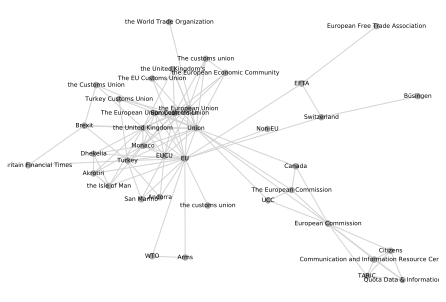

<Figure size 432x288 with 0 Axes>

In [46]:
nx.draw(G, pos=pos, 
        with_labels=True,
        font_size = 6, 
        node_color = 'darkgray', 
        edge_color = 'lightgray',
        node_size=30)
plt.show()
plt.savefig('img/single_doc_ent_net.pdf')

In [47]:
deg_centrality = nx.degree_centrality(G)
bet_centrality = nx.betweenness_centrality(G)
eig_centrality = nx.eigenvector_centrality(G)
# and so on... 

In [48]:
pd.DataFrame([deg_centrality, bet_centrality, eig_centrality])

cents = pd.DataFrame([deg_centrality, bet_centrality, eig_centrality]).T
cents.columns = ['Degree', "Betweenness", "Eigenvector"]

cents

,Degree,Betweenness,Eigenvector
Monaco,0.263158,0.023979,0.286246
the United Kingdom,0.342105,0.064496,0.320300
The European Union Customs Union,0.184211,0.000000,0.245183
EU,0.526316,0.445760,0.360723
EUCU,0.263158,0.022404,0.285680
European Union,0.315789,0.040425,0.312465
the European Union,0.263158,0.022380,0.283199
Union,0.526316,0.468709,0.367613
the customs union,0.026316,0.000000,0.039907
Turkey,0.236842,0.065901,0.196789


In [49]:
cents.sort_values('Degree', ascending=False)[:10]

,Degree,Betweenness,Eigenvector
EU,0.526316,0.445760,0.360723
Union,0.526316,0.468709,0.367613
the United Kingdom,0.342105,0.064496,0.320300
European Union,0.315789,0.040425,0.312465
Monaco,0.263158,0.023979,0.286246
EUCU,0.263158,0.022404,0.285680
the European Union,0.263158,0.022380,0.283199
Turkey,0.236842,0.065901,0.196789
European Commission,0.210526,0.193931,0.064005
The European Union Customs Union,0.184211,0.000000,0.245183


In [52]:
excerpt, token_count = see_semantic_context('Monaco', docs[1].text, 6)

for e in excerpt:
    print(e)

states of the european union (eu), **MONACO,** the united kingdom, and some dependencies
be negotiated. == non-eu participants == **MONACO,** the united kingdom*, and the british


# Let's Scale Up to Multiple Docs

In [60]:
def proc_docs(list_of_docs):
    coocs = []

    for doc in list_of_docs:
        cooccurrences = []
        
        sentences = [str(sent) for sent in doc.sents]
        po = set([str(ent) for ent in doc.ents if ent.label_ in ['GPE', 'ORG']])
        
        for s in sentences:
            ents = [entity_in_string(s, po)] # this is the function I defined earlier
            cooccurrences.append(ents[0])
        
        coocs.extend(cooccurrences) # extend is like append, but puts the content of a list in another list rather than the list object itself
    
    return coocs

In [61]:
dents = proc_docs(docs)
dents

[['European Union', 'Union', 'EU', 'The European Union', 'Euro'],
 [],
 ['EU'],
 ['EU'],
 [],
 ['EU', 'euro'],
 ['EU', 'Euro'],
 ['the European Coal and Steel Community',
  'EEC',
  'Paris',
  'European Economic Community',
  'Rome',
  'European Coal and Steel Community',
  'EU',
  'Community',
  'ECSC',
  'the European Economic Community',
  'Euro'],
 ['West Germany',
  'France',
  'Netherlands',
  'the European Communities',
  'Italy',
  'the Netherlands',
  'Belgium',
  'Luxembourg',
  'Germany',
  'Euro'],
 [],
 ['the Treaty of Lisbon', 'EU'],
 ['United Kingdom', 'the United Kingdom', 'EU'],
 ['UK'],
 ['UK', 'EU'],
 ['Algeria', 'EU'],
 ['United Kingdom', 'the United Kingdom', 'EU', 'US'],
 ['the United Nations Development Programme',
  'United Nations',
  'EU',
  'the United Nations'],
 ['EU'],
 ['EU', 'Security Policy'],
 ['United Nations',
  'the World Trade Organization',
  'the United Nations',
  'G20',
  'World'],
 ['European Union', 'Union', 'the European Union', 'Euro'],
 []

In [62]:
combos = Counter(chain.from_iterable(combinations(each, 2) for each in dents))
edges = pd.Series(combos).reset_index()
edges.columns = ['i', 'j', 'weight']
network = nx.from_pandas_edgelist(edges, 'i', 'j', 'weight')

In [63]:
print(nx.info(network))

Name: 
Type: Graph
Number of nodes: 780
Number of edges: 4167
Average degree:  10.6846


In [64]:
nx.number_connected_components(network)

14

In [65]:
[len(c) for c in sorted(nx.connected_components(network), key=len, reverse=True)]

[742, 10, 5, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

In [66]:
components = [network.subgraph(c) for c in nx.connected_components(network)]
for each in components:
    print(nx.info(each), '\n')

Name: 
Type: Graph
Number of nodes: 742
Number of edges: 4122
Average degree:  11.1105 

Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000 

Name: 
Type: Graph
Number of nodes: 5
Number of edges: 10
Average degree:   4.0000 

Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000 

Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000 

Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000 

Name: 
Type: Graph
Number of nodes: 3
Number of edges: 3
Average degree:   2.0000 

Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000 

Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000 

Name: 
Type: Graph
Number of nodes: 10
Number of edges: 22
Average degree:   4.4000 

Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000 

Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average deg

In [67]:
giant = components[0]

In [68]:
# pos = nx.spring_layout(giant, seed=23)
pos = nx.kamada_kawai_layout(giant)

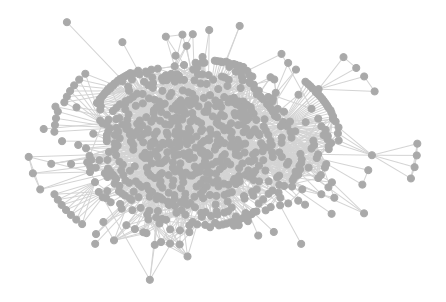

<Figure size 432x288 with 0 Axes>

In [69]:
nx.draw(giant, pos=pos, 
        with_labels=False, 
        font_size = 6, 
        node_color = 'darkgray', 
        edge_color = 'lightgray',
        node_size=50)
plt.show()
plt.savefig('img/multi_doc_net.pdf')

A hairball! Anyway, you can proceed as you like here... 

# Vectorization and Comparisons

In [70]:
import requests
from bs4 import BeautifulSoup

In [71]:
V1 = 'http://opensourcemuellerreport.com/mueller-report-vol-1.html'
V2 = 'http://opensourcemuellerreport.com/mueller-report-vol-2.html'

def get_soup(url,printed=False):
    r = requests.get(url)
    soup = BeautifulSoup(r.content, 'lxml')
    if printed is True:
        print(soup.prettify)
    return soup

soup_v1 = get_soup(V1)
soup_v2 = get_soup(V2)

In [72]:
V1_text = soup_v1.findAll('p')
print("There are {} paragraphs in Volume 1.".format(len(V1_text)))

V2_text = soup_v2.findAll('p')
print("There are {} paragraphs in Volume 1.".format(len(V2_text)))

There are 2064 paragraphs in Volume 1.
There are 1782 paragraphs in Volume 1.


How many have redactions? 

In [100]:
# combine the text of the two volumes
core_text = V1_text + V2_text

redaction_counts = [len(para.find_all("span", class_="redacted")) for para in core_text]

red = pd.DataFrame(redaction_counts,columns=['No. Redactions'])
red['Paragraph Index'] = red.index

red_by_para = red.groupby('No. Redactions')['Paragraph Index'].size().reset_index()
red_by_para.columns = ['No. Redactions', 'No. Paragraphs']
print(red_by_para.sort_values('No. Redactions', ascending=False))

    No. Redactions  No. Paragraphs
21              51               1
20              40               1
19              31               1
18              27               1
17              21               1
16              20               1
15              18               3
14              15               2
13              13               1
12              12               3
11              11               4
10              10               3
9                9              12
8                8               7
7                7               6
6                6               7
5                5              17
4                4              20
3                3              31
2                2              94
1                1             415
0                0            3215


Great, let's proceed. 

In [73]:
v1t = [" ".join(p.text.strip().replace('\n', '') for p in V1_text)]
text_1 = v1t[0]

In [74]:
print('We have a {} containing {} words!'.format(type(text_1), len(text_1)))

We have a <class 'str'> containing 547665 words!


In [75]:
def get_single_string(souped):
    text_list = [" ".join(p.text.strip().replace('\n', '') for p in souped)]
    doc = nlp(text_list[0]) # be careful with this in a function! 
    npns = [token.text for token in doc if token.pos_ in ['NOUN', 'PNOUN']]
    return npns

In [85]:
V1proc = get_single_string(V1_text)
V2proc = get_single_string(V2_text)

In [86]:
V1proc

['Source',
 'theReport',
 'C.F.R.',
 'CC',
 'CC',
 'report',
 '§',
 'a]t',
 'conclusion',
 'work',
 'report',
 'prosecution',
 'declination',
 'government',
 'election',
 'fashion',
 'Evidence',
 'government',
 'operations',
 'response',
 'teampublicly',
 'hackers',
 'computer',
 'network',
 'Releases',
 'materials',
 'hacks',
 'reporting',
 'government',
 'month',
 'releases',
 'organization',
 'releases',
 'andNovember',
 'release',
 'documents',
 'government',
 'policy',
 'advisor',
 'representative',
 'government',
 'indications',
 'government',
 'release',
 'information',
 'presidentialcandidate',
 'information',
 'investigation',
 'individuals',
 'government',
 'interferenceactivities',
 'fall',
 'agencies',
 'government',
 'compromises',
 'e',
 'mails',
 'persons',
 'institutions',
 'politicalorganizations',
 'thefts',
 'disclosures',
 'process',
 'election',
 'sanctions',
 'election',
 'committees',
 'interference',
 'theelection',
 'efforts',
 '2017appointment',
 'order',
 'go

Let's do a simple difference of proportions analysis. 

In [88]:
from sklearn.feature_extraction.text import CountVectorizer

dpvect = CountVectorizer(stop_words="english", lowercase = True, strip_accents='ascii') 
matrix = dpvect.fit_transform([" ".join(V1proc), " ".join(V2proc)])
diffs = pd.DataFrame(matrix.toarray(), columns=dpvect.get_feature_names())

The first row is Volume 1. The second row is Volume 2. 

In [89]:
diffs

,000,00000015,0000003680,000003680,000022,000032,00005672,00061825,000emails,10,...,yearsto,yesterday,yourconvenience,yourpassport,yourphones,youto,youtube,zenith,zivotofsky,zone
0,2,2,0,0,0,0,0,0,0,10,...,0,2,1,1,1,0,1,0,0,1
1,0,0,1,1,1,2,1,1,1,5,...,1,3,0,0,0,1,0,1,2,1


In [90]:
freq_rt = diffs.T.sort_values(0, ascending=False)[:10][0]
freq_lt = diffs.T.sort_values(1, ascending=False)[:10][1]

print('10 most frequent Volume 1 words:\n{}'.format(freq_rt.index.str.cat(sep=' ')), '\n')
print('10 most frequent Volume 2 words:\n{}'.format(freq_lt.index.str.cat(sep=' ')))

10 most frequent Volume 1 words:
meeting campaign email government information investigation election emails candidate time 

10 most frequent Volume 2 words:
investigation meeting statement counsel evidence conduct day obstruction justice time


Some nice pandas... 🐼🐼🐼

In [92]:
all_words = diffs.sum(axis=1)
diffs = diffs.iloc[:,0:].div(all_words, axis=0)
diffs.loc[2] = diffs.loc[0] - diffs.loc[1]

In [93]:
diffs

,000,00000015,0000003680,000003680,000022,000032,00005672,00061825,000emails,10,...,yearsto,yesterday,yourconvenience,yourpassport,yourphones,youto,youtube,zenith,zivotofsky,zone
0,0.000167,0.000167,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000837,...,0.000000,0.000167,0.000084,0.000084,0.000084,0.000000,0.000084,0.000000,0.000000,0.000084
1,0.000000,0.000000,0.000078,0.000078,0.000078,0.000155,0.000078,0.000078,0.000078,0.000388,...,0.000078,0.000233,0.000000,0.000000,0.000000,0.000078,0.000000,0.000078,0.000155,0.000078
2,0.000167,0.000167,-0.000078,-0.000078,-0.000078,-0.000155,-0.000078,-0.000078,-0.000078,0.000449,...,-0.000078,-0.000065,0.000084,0.000084,0.000084,-0.000078,0.000084,-0.000078,-0.000155,0.000006


In [94]:
dop = pd.DataFrame(diffs.loc[2].sort_values(axis=0, ascending=False))
dop.columns = ['DoP']
dop['Word'] = dop.index

In [95]:
dop

,DoP,Word
email,0.012185,email
campaign,0.011968,campaign
meeting,0.008741,meeting
government,0.007316,government
candidate,0.006032,candidate
...,...,...
conduct,-0.007597,conduct
statement,-0.007712,statement
obstruction,-0.007730,obstruction
counsel,-0.009866,counsel


In [96]:
num_words = 25
comp = pd.concat([dop.head(num_words),dop.tail(num_words)])

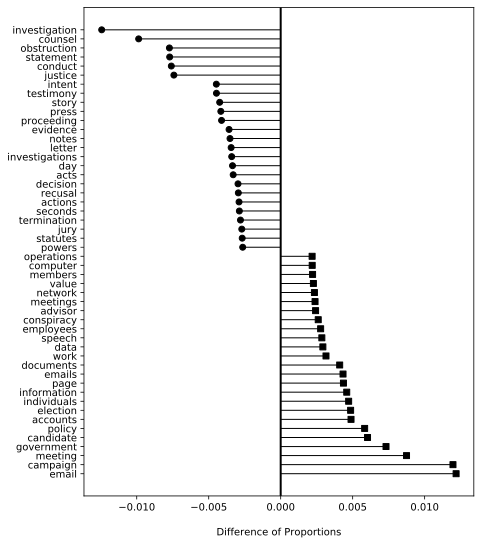

In [97]:
fig, ax = plt.subplots(figsize=(7, 9))

ax.hlines(comp['Word'], xmin=0, xmax=comp['DoP'], linewidth=1)
ax.plot(comp['DoP'][:num_words], comp['Word'][:num_words], "s", color='black', markersize = 6)
ax.plot(comp['DoP'][num_words:], comp['Word'][num_words:], "o", color='black', markersize = 6)

plt.axvline(x=0, color='black', linewidth=2)

yticks = plt.yticks(comp['Word'])
xlab = plt.xlabel('\nDifference of Proportions')

plt.savefig('img/difference_of_proportions.pdf')